<a href="https://colab.research.google.com/github/Jongsam-KIM/langgraph/blob/main/QRcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 1s (61.2 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
QR코드에 넣을 사이트 주소를 입력하세요: www.macabiz.com
QR코드 아

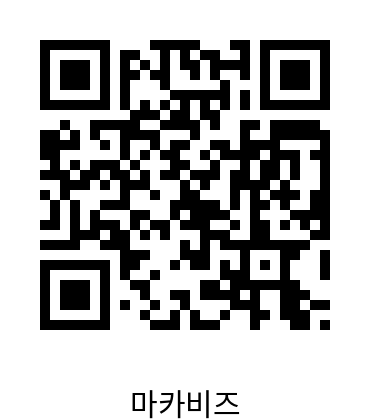

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# 단계 1: 필요한 라이브러리 설치 (QR코드 + 한글폰트)
!pip install qrcode[pil]
!apt-get -y install fonts-noto-cjk  # Google에서 만든 한글 포함 폰트 설치

# 단계 2: 파이썬에서 사용할 라이브러리 불러오기
import qrcode
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from google.colab import files
import os

# 단계 3: 사용자로부터 입력 받기
site_url = input("QR코드에 넣을 사이트 주소를 입력하세요: ")
site_name = input("QR코드 아래에 표시할 사이트명을 입력하세요: ")

# 단계 4: QR 코드 객체 생성 및 데이터 추가
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4
)
qr.add_data(site_url)
qr.make(fit=True)
qr_img = qr.make_image(fill_color="black", back_color="white").convert("RGB")

# 단계 5: 한글 폰트 설정 (NotoSansCJK로 설정)
font_path = "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"
font = ImageFont.truetype(font_path, 30)

# 단계 6: 텍스트 크기 측정
dummy_draw = ImageDraw.Draw(qr_img)
bbox = dummy_draw.textbbox((0, 0), site_name, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]

# 단계 7: 새로운 이미지 캔버스 만들기
qr_width, qr_height = qr_img.size
new_height = qr_height + text_height + 20
new_img = Image.new("RGB", (qr_width, new_height), "white")
new_img.paste(qr_img, (0, 0))

# 단계 8: 텍스트 추가
draw = ImageDraw.Draw(new_img)
text_x = (qr_width - text_width) // 2
text_y = qr_height + 10
draw.text((text_x, text_y), site_name, font=font, fill="black")

# 단계 9: 파일 저장 (한글 파일명도 가능)
filename = f"{site_name}_QR코드.png"
filename_safe = filename.replace(" ", "_")  # 공백 제거(다운로드 문제 방지)
new_img.save(filename_safe)

# 단계 10: 이미지 출력 및 다운로드
display(new_img)
files.download(filename_safe)
